In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 

In [9]:
data=pd.read_csv("pima-indians-diabetes (4).csv")

In [10]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- few columns like plas,pres,skin,test and mass has 0 as its some values which does not make any sense thus let us 

In [16]:
pima_df=data.copy()

In [17]:
pima_df[["Plas","Pres","skin","test","mass","test"]]=pima_df[["Plas","Pres","skin","test","mass","test"]].replace(0,np.nan)

In [20]:
imputer =SimpleImputer(missing_values=np.nan,strategy="median")
pima_df=pd.DataFrame(imputer.fit_transform(pima_df),columns=data.columns)

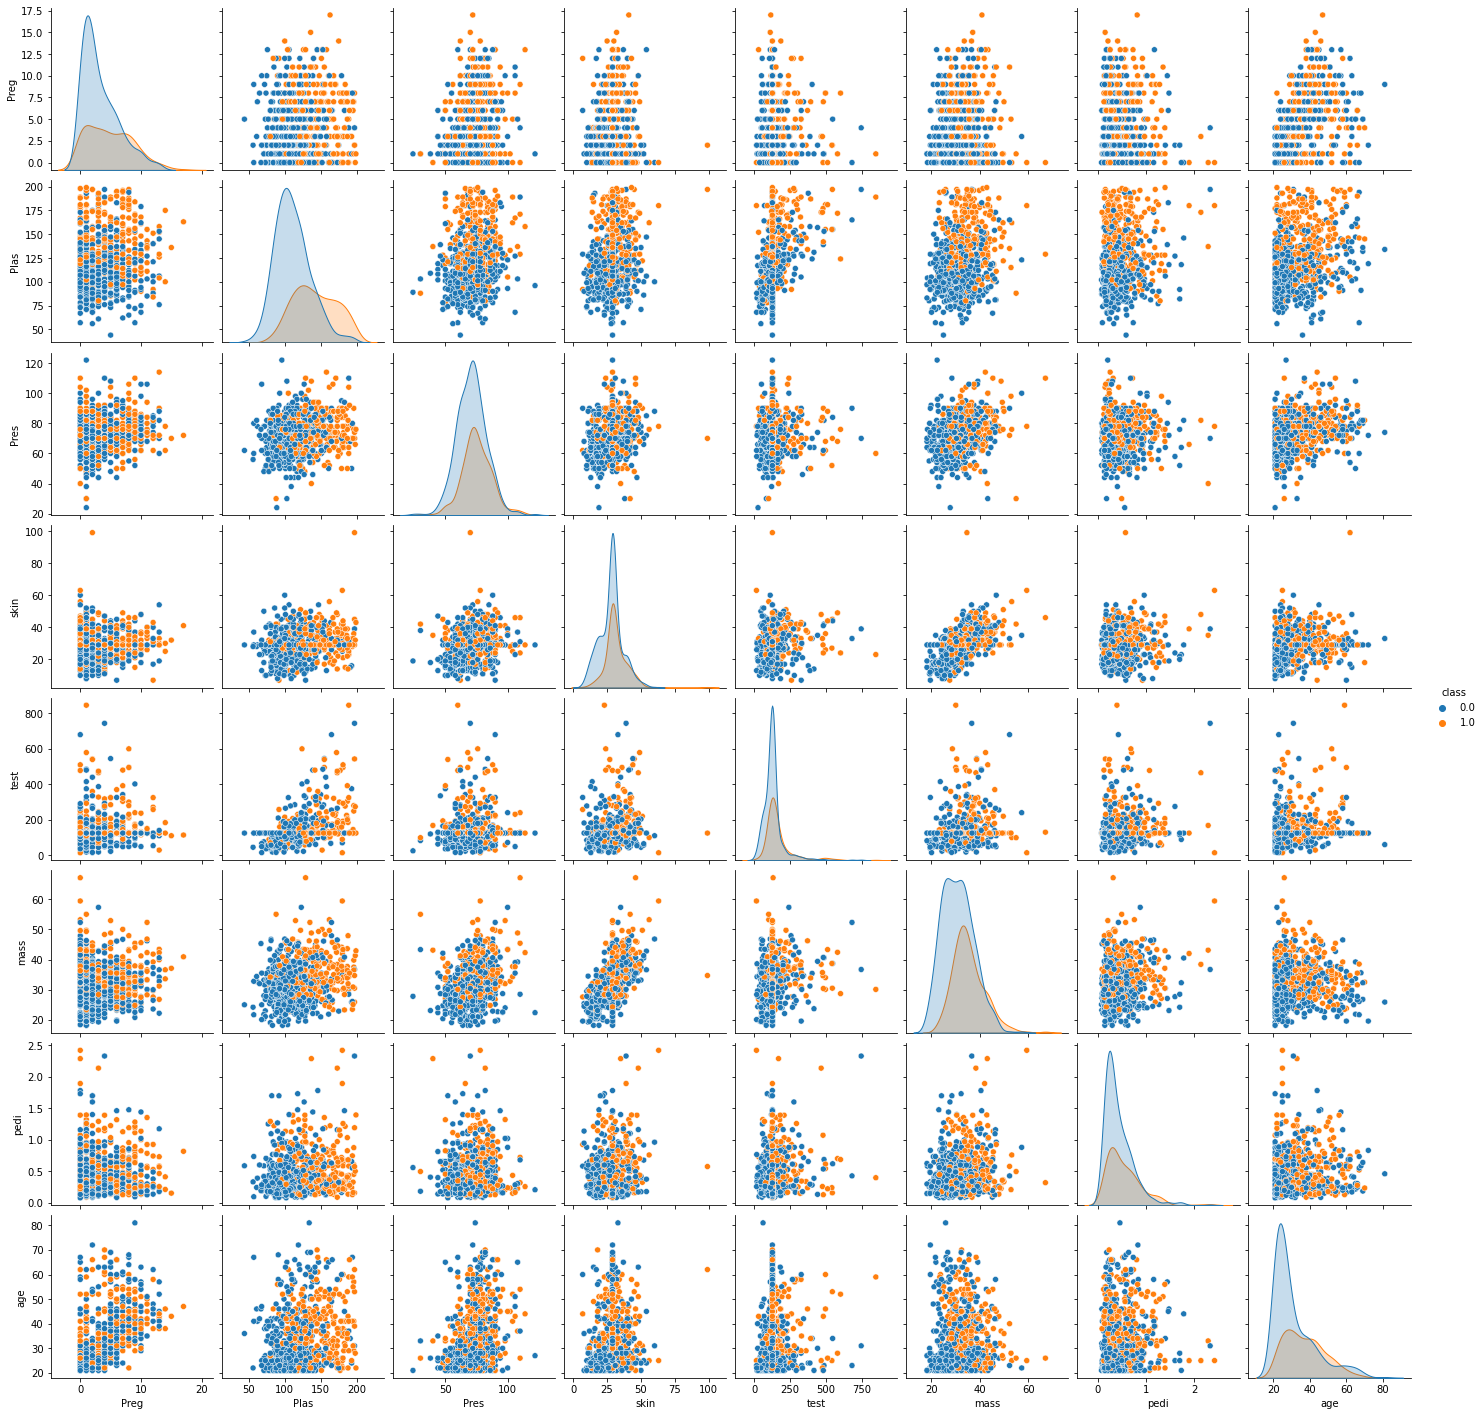

In [23]:
sns.pairplot(pima_df,hue="class",diag_kind="kde")

In [26]:
pima_df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [53]:
X=pima_df.drop("class",axis=1)
y=pima_df["class"]

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=1)

In [55]:
clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [56]:
print("training score",clf.score(X_train,y_train))
print("test score",clf.score(X_test,y_test))

training score 1.0
test score 0.6948051948051948


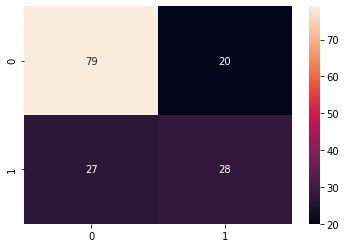

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## Regularization of tree

In [65]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [66]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [67]:
print("training score",clf.score(X_train,y_train))
print("test score",clf.score(X_test,y_test))

training score 0.8045602605863192
test score 0.7857142857142857


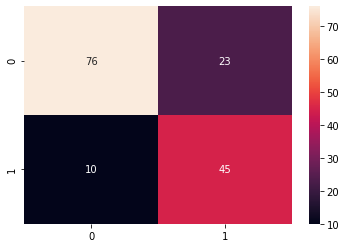

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)